In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MY_BOUNDED_SET = 40000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../data.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(40000, 3) (40000, 3) (12949, 3) (12949, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       ...,
       [0.904299 , 0.472788 , 0.346908 ],
       [0.902748 , 0.471081 , 0.340883 ],
       [0.901134 , 0.469546 , 0.334878 ]], dtype=float32)

In [9]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [10]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(40000, 3) dtype=float32>

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [12]:
session.run(tf.global_variables_initializer())

In [13]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [14]:
print (y_true.shape)

(?, 3)


In [15]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        #print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        #pred_list += [session.run(output_layer,feed_dict=feed_dict_train)]

In [16]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [17]:
train(N_EPOCHS)
#predict()
#output_layer

Train Accuracy :  0.4970425
Train Accuracy :  0.49653387
Train Accuracy :  0.4960254
Train Accuracy :  0.49551725
Train Accuracy :  0.49500942
Train Accuracy :  0.49450204
Train Accuracy :  0.493995
Train Accuracy :  0.4934884
Train Accuracy :  0.4929822
Train Accuracy :  0.49247646
Train Accuracy :  0.49197114
Train Accuracy :  0.49146613
Train Accuracy :  0.49096152
Train Accuracy :  0.4904573
Train Accuracy :  0.48995352
Train Accuracy :  0.48945016
Train Accuracy :  0.48894736
Train Accuracy :  0.488445
Train Accuracy :  0.48794323
Train Accuracy :  0.4874419
Train Accuracy :  0.4869411
Train Accuracy :  0.4864408
Train Accuracy :  0.48594096
Train Accuracy :  0.4854416
Train Accuracy :  0.48494264
Train Accuracy :  0.4844442
Train Accuracy :  0.48394617
Train Accuracy :  0.48344857
Train Accuracy :  0.4829514
Train Accuracy :  0.48245463
Train Accuracy :  0.48195818
Train Accuracy :  0.48146212
Train Accuracy :  0.48096645
Train Accuracy :  0.4804711
Train Accuracy :  0.47997606
T

Train Accuracy :  0.3446853
Train Accuracy :  0.34419486
Train Accuracy :  0.34370458
Train Accuracy :  0.34321436
Train Accuracy :  0.34272394
Train Accuracy :  0.34223333
Train Accuracy :  0.34174237
Train Accuracy :  0.341251
Train Accuracy :  0.34075928
Train Accuracy :  0.3402672
Train Accuracy :  0.33977473
Train Accuracy :  0.33928198
Train Accuracy :  0.33878884
Train Accuracy :  0.33829534
Train Accuracy :  0.33780137
Train Accuracy :  0.3373069
Train Accuracy :  0.33681074
Train Accuracy :  0.3363117
Train Accuracy :  0.33581105
Train Accuracy :  0.33530945
Train Accuracy :  0.33480725
Train Accuracy :  0.33430442
Train Accuracy :  0.33380076
Train Accuracy :  0.33329615
Train Accuracy :  0.33278987
Train Accuracy :  0.3322817
Train Accuracy :  0.33177102
Train Accuracy :  0.33125725
Train Accuracy :  0.3307423
Train Accuracy :  0.3302264
Train Accuracy :  0.3297095
Train Accuracy :  0.32919174
Train Accuracy :  0.3286732
Train Accuracy :  0.32815403
Train Accuracy :  0.32763

Train Accuracy :  0.1654164
Train Accuracy :  0.1650037
Train Accuracy :  0.16459271
Train Accuracy :  0.16418345
Train Accuracy :  0.16377589
Train Accuracy :  0.16337
Train Accuracy :  0.16296576
Train Accuracy :  0.16256317
Train Accuracy :  0.16216218
Train Accuracy :  0.16176271
Train Accuracy :  0.16136478
Train Accuracy :  0.16096836
Train Accuracy :  0.16057348
Train Accuracy :  0.16017996
Train Accuracy :  0.15978776
Train Accuracy :  0.15939686
Train Accuracy :  0.15900733
Train Accuracy :  0.15861906
Train Accuracy :  0.15823208
Train Accuracy :  0.15784633
Train Accuracy :  0.15746178
Train Accuracy :  0.15707843
Train Accuracy :  0.15669623
Train Accuracy :  0.15631522
Train Accuracy :  0.15593538
Train Accuracy :  0.15555665
Train Accuracy :  0.15517907
Train Accuracy :  0.15480258
Train Accuracy :  0.15442716
Train Accuracy :  0.15405276
Train Accuracy :  0.15367948
Train Accuracy :  0.15330727
Train Accuracy :  0.1529361
Train Accuracy :  0.15256588
Train Accuracy :  0.

Train Accuracy :  0.07105012
Train Accuracy :  0.0708016
Train Accuracy :  0.07055326
Train Accuracy :  0.0703051
Train Accuracy :  0.07005711
Train Accuracy :  0.06980926
Train Accuracy :  0.0695616
Train Accuracy :  0.06931414
Train Accuracy :  0.06906686
Train Accuracy :  0.068819776
Train Accuracy :  0.068572894
Train Accuracy :  0.06832617
Train Accuracy :  0.068079636
Train Accuracy :  0.0678333
Train Accuracy :  0.06758712
Train Accuracy :  0.06734116
Train Accuracy :  0.06709536
Train Accuracy :  0.066849746
Train Accuracy :  0.06660428
Train Accuracy :  0.06635899
Train Accuracy :  0.06611387
Train Accuracy :  0.06586891
Train Accuracy :  0.06562411
Train Accuracy :  0.06537949
Train Accuracy :  0.06513502
Train Accuracy :  0.06489071
Train Accuracy :  0.064646594
Train Accuracy :  0.06440267
Train Accuracy :  0.06415894
Train Accuracy :  0.063915394
Train Accuracy :  0.06367204
Train Accuracy :  0.063428804
Train Accuracy :  0.06318579
Train Accuracy :  0.06294293
Train Accur

Train Accuracy :  0.017131675
Train Accuracy :  0.017032549
Train Accuracy :  0.01693405
Train Accuracy :  0.01683617
Train Accuracy :  0.016738895
Train Accuracy :  0.016642202
Train Accuracy :  0.016546104
Train Accuracy :  0.016450617
Train Accuracy :  0.016355723
Train Accuracy :  0.016261423
Train Accuracy :  0.016167706
Train Accuracy :  0.016074562
Train Accuracy :  0.015981978
Train Accuracy :  0.01588995
Train Accuracy :  0.01579848
Train Accuracy :  0.015707556
Train Accuracy :  0.015617197
Train Accuracy :  0.015527398
Train Accuracy :  0.015438148
Train Accuracy :  0.015349468
Train Accuracy :  0.015261353
Train Accuracy :  0.015173777
Train Accuracy :  0.015086721
Train Accuracy :  0.015000192
Train Accuracy :  0.014914168
Train Accuracy :  0.01482865
Train Accuracy :  0.014743654
Train Accuracy :  0.014659171
Train Accuracy :  0.014575187
Train Accuracy :  0.014491697
Train Accuracy :  0.014408685
Train Accuracy :  0.014326146
Train Accuracy :  0.014244095
Train Accuracy 

Train Accuracy :  0.0027533602
Train Accuracy :  0.002729265
Train Accuracy :  0.0027053
Train Accuracy :  0.0026814532
Train Accuracy :  0.0026577131
Train Accuracy :  0.002634102
Train Accuracy :  0.0026106206
Train Accuracy :  0.0025872637
Train Accuracy :  0.002564007
Train Accuracy :  0.0025408892
Train Accuracy :  0.0025179256
Train Accuracy :  0.0024950732
Train Accuracy :  0.0024723373
Train Accuracy :  0.0024497248
Train Accuracy :  0.0024272297
Train Accuracy :  0.002404873
Train Accuracy :  0.0023826596
Train Accuracy :  0.0023605532
Train Accuracy :  0.0023385677
Train Accuracy :  0.0023167243
Train Accuracy :  0.0022949881
Train Accuracy :  0.0022733323
Train Accuracy :  0.0022517955
Train Accuracy :  0.0022303795
Train Accuracy :  0.002209086
Train Accuracy :  0.0021879394
Train Accuracy :  0.0021669273
Train Accuracy :  0.0021460657
Train Accuracy :  0.0021253354
Train Accuracy :  0.0021047057
Train Accuracy :  0.0020841444
Train Accuracy :  0.0020636762
Train Accuracy :

Train Accuracy :  0.00016900645
Train Accuracy :  0.0001689834
Train Accuracy :  0.00016620362
Train Accuracy :  0.00016084049
Train Accuracy :  0.00015971715
Train Accuracy :  0.00016109554
Train Accuracy :  0.00016002607
Train Accuracy :  0.00016009696
Train Accuracy :  0.00016465348
Train Accuracy :  0.00016665891
Train Accuracy :  0.00016343241
Train Accuracy :  0.00016115133
Train Accuracy :  0.00015873737
Train Accuracy :  0.00015502736
Train Accuracy :  0.00015392108
Train Accuracy :  0.00015467923
Train Accuracy :  0.00015393498
Train Accuracy :  0.00015379573
Train Accuracy :  0.00015595995
Train Accuracy :  0.00015674683
Train Accuracy :  0.00015620979
Train Accuracy :  0.00015652673
Train Accuracy :  0.00015475714
Train Accuracy :  0.00015117612
Train Accuracy :  0.00014947957
Train Accuracy :  0.00014818515
Train Accuracy :  0.00014622029
Train Accuracy :  0.000145745
Train Accuracy :  0.00014652364
Train Accuracy :  0.00014720556
Train Accuracy :  0.00014961856
Train Accur

Train Accuracy :  9.410642e-05
Train Accuracy :  9.398593e-05
Train Accuracy :  9.3811665e-05
Train Accuracy :  9.368388e-05
Train Accuracy :  9.3723116e-05
Train Accuracy :  9.378488e-05
Train Accuracy :  9.376723e-05
Train Accuracy :  9.388438e-05
Train Accuracy :  9.405024e-05
Train Accuracy :  9.4091534e-05
Train Accuracy :  9.4036506e-05
Train Accuracy :  9.3978386e-05
Train Accuracy :  9.379116e-05
Train Accuracy :  9.355112e-05
Train Accuracy :  9.3352355e-05
Train Accuracy :  9.317021e-05
Train Accuracy :  9.293886e-05
Train Accuracy :  9.276598e-05
Train Accuracy :  9.263306e-05
Train Accuracy :  9.247397e-05
Train Accuracy :  9.233243e-05
Train Accuracy :  9.224985e-05
Train Accuracy :  9.2105984e-05
Train Accuracy :  9.196159e-05
Train Accuracy :  9.188215e-05
Train Accuracy :  9.1794005e-05
Train Accuracy :  9.1620524e-05
Train Accuracy :  9.154225e-05
Train Accuracy :  9.151347e-05
Train Accuracy :  9.139229e-05
Train Accuracy :  9.1277005e-05
Train Accuracy :  9.128037e-0

Train Accuracy :  8.246393e-05
Train Accuracy :  8.252082e-05
Train Accuracy :  8.2648454e-05
Train Accuracy :  8.272533e-05
Train Accuracy :  8.266646e-05
Train Accuracy :  8.257848e-05
Train Accuracy :  8.250811e-05
Train Accuracy :  8.2360384e-05
Train Accuracy :  8.2140796e-05
Train Accuracy :  8.1988146e-05
Train Accuracy :  8.186959e-05
Train Accuracy :  8.171099e-05
Train Accuracy :  8.156391e-05
Train Accuracy :  8.147171e-05
Train Accuracy :  8.139263e-05
Train Accuracy :  8.131908e-05
Train Accuracy :  8.1253675e-05
Train Accuracy :  8.125434e-05
Train Accuracy :  8.1293285e-05
Train Accuracy :  8.131392e-05
Train Accuracy :  8.136304e-05
Train Accuracy :  8.1565115e-05
Train Accuracy :  8.186344e-05
Train Accuracy :  8.207036e-05
Train Accuracy :  8.222315e-05
Train Accuracy :  8.244827e-05
Train Accuracy :  8.253517e-05
Train Accuracy :  8.2321356e-05
Train Accuracy :  8.201717e-05
Train Accuracy :  8.183491e-05
Train Accuracy :  8.166885e-05
Train Accuracy :  8.145128e-05


Train Accuracy :  7.7124e-05
Train Accuracy :  7.7083496e-05
Train Accuracy :  7.7083816e-05
Train Accuracy :  7.716897e-05
Train Accuracy :  7.718275e-05
Train Accuracy :  7.709992e-05
Train Accuracy :  7.7039556e-05
Train Accuracy :  7.701847e-05
Train Accuracy :  7.6964694e-05
Train Accuracy :  7.68966e-05
Train Accuracy :  7.683397e-05
Train Accuracy :  7.6824035e-05
Train Accuracy :  7.682119e-05
Train Accuracy :  7.680178e-05
Train Accuracy :  7.681641e-05
Train Accuracy :  7.687932e-05
Train Accuracy :  7.6895725e-05
Train Accuracy :  7.687978e-05
Train Accuracy :  7.690671e-05
Train Accuracy :  7.695109e-05
Train Accuracy :  7.692676e-05
Train Accuracy :  7.688674e-05
Train Accuracy :  7.688152e-05
Train Accuracy :  7.6845805e-05
Train Accuracy :  7.678455e-05
Train Accuracy :  7.674895e-05
Train Accuracy :  7.668708e-05
Train Accuracy :  7.6626166e-05
Train Accuracy :  7.659207e-05
Train Accuracy :  7.654637e-05
Train Accuracy :  7.6489836e-05
Train Accuracy :  7.64444e-05
Tra

Train Accuracy :  7.425772e-05
Train Accuracy :  7.425994e-05
Train Accuracy :  7.420006e-05
Train Accuracy :  7.4140786e-05
Train Accuracy :  7.411706e-05
Train Accuracy :  7.405632e-05
Train Accuracy :  7.394529e-05
Train Accuracy :  7.3869014e-05
Train Accuracy :  7.383375e-05
Train Accuracy :  7.3782176e-05
Train Accuracy :  7.367695e-05
Train Accuracy :  7.358659e-05
Train Accuracy :  7.356974e-05
Train Accuracy :  7.3538075e-05
Train Accuracy :  7.3433046e-05
Train Accuracy :  7.3338946e-05
Train Accuracy :  7.3332e-05
Train Accuracy :  7.3312156e-05
Train Accuracy :  7.318863e-05
Train Accuracy :  7.310915e-05
Train Accuracy :  7.3150426e-05
Train Accuracy :  7.314742e-05
Train Accuracy :  7.303602e-05
Train Accuracy :  7.3006006e-05
Train Accuracy :  7.307069e-05
Train Accuracy :  7.310787e-05
Train Accuracy :  7.313593e-05
Train Accuracy :  7.329928e-05
Train Accuracy :  7.359051e-05
Train Accuracy :  7.3911775e-05
Train Accuracy :  7.430228e-05
Train Accuracy :  7.476124e-05


Train Accuracy :  7.148853e-05
Train Accuracy :  7.1487775e-05
Train Accuracy :  7.1526265e-05
Train Accuracy :  7.14424e-05
Train Accuracy :  7.1302995e-05
Train Accuracy :  7.1276496e-05
Train Accuracy :  7.1304574e-05
Train Accuracy :  7.121643e-05
Train Accuracy :  7.109531e-05
Train Accuracy :  7.111111e-05
Train Accuracy :  7.109057e-05
Train Accuracy :  7.097537e-05
Train Accuracy :  7.0961236e-05
Train Accuracy :  7.109079e-05
Train Accuracy :  7.119139e-05
Train Accuracy :  7.126327e-05
Train Accuracy :  7.151035e-05
Train Accuracy :  7.191282e-05
Train Accuracy :  7.2275194e-05
Train Accuracy :  7.2592804e-05
Train Accuracy :  7.286694e-05
Train Accuracy :  7.293241e-05
Train Accuracy :  7.272529e-05
Train Accuracy :  7.247729e-05
Train Accuracy :  7.2262184e-05
Train Accuracy :  7.2028786e-05
Train Accuracy :  7.1857394e-05
Train Accuracy :  7.182824e-05
Train Accuracy :  7.182289e-05
Train Accuracy :  7.178151e-05
Train Accuracy :  7.182814e-05
Train Accuracy :  7.194226e-0

Train Accuracy :  7.1116425e-05
Train Accuracy :  7.087194e-05
Train Accuracy :  7.066724e-05
Train Accuracy :  7.054177e-05
Train Accuracy :  7.037416e-05
Train Accuracy :  7.026622e-05
Train Accuracy :  7.028766e-05
Train Accuracy :  7.037716e-05
Train Accuracy :  7.042585e-05
Train Accuracy :  7.045564e-05
Train Accuracy :  7.051877e-05
Train Accuracy :  7.054665e-05
Train Accuracy :  7.0477436e-05
Train Accuracy :  7.0421636e-05
Train Accuracy :  7.0384005e-05
Train Accuracy :  7.031122e-05
Train Accuracy :  7.026365e-05
Train Accuracy :  7.024415e-05
Train Accuracy :  7.0202404e-05
Train Accuracy :  7.01687e-05
Train Accuracy :  7.016612e-05
Train Accuracy :  7.016905e-05
Train Accuracy :  7.015835e-05
Train Accuracy :  7.0153095e-05
Train Accuracy :  7.014234e-05
Train Accuracy :  7.013396e-05
Train Accuracy :  7.010894e-05
Train Accuracy :  7.007993e-05
Train Accuracy :  7.0074435e-05
Train Accuracy :  7.0032496e-05
Train Accuracy :  6.995325e-05
Train Accuracy :  6.99412e-05
Tr

Train Accuracy :  6.871551e-05
Train Accuracy :  6.8699774e-05
Train Accuracy :  6.8707894e-05
Train Accuracy :  6.872465e-05
Train Accuracy :  6.8679874e-05
Train Accuracy :  6.862505e-05
Train Accuracy :  6.863602e-05
Train Accuracy :  6.86161e-05
Train Accuracy :  6.850698e-05
Train Accuracy :  6.8468486e-05
Train Accuracy :  6.85131e-05
Train Accuracy :  6.8456044e-05
Train Accuracy :  6.8372516e-05
Train Accuracy :  6.83955e-05
Train Accuracy :  6.8419526e-05
Train Accuracy :  6.837049e-05
Train Accuracy :  6.832174e-05
Train Accuracy :  6.833528e-05
Train Accuracy :  6.836302e-05
Train Accuracy :  6.835265e-05
Train Accuracy :  6.830731e-05
Train Accuracy :  6.8277055e-05
Train Accuracy :  6.8303125e-05
Train Accuracy :  6.8334804e-05
Train Accuracy :  6.8286136e-05
Train Accuracy :  6.825959e-05
Train Accuracy :  6.833242e-05
Train Accuracy :  6.831452e-05
Train Accuracy :  6.822028e-05
Train Accuracy :  6.824742e-05
Train Accuracy :  6.829541e-05
Train Accuracy :  6.8245965e-05

Train Accuracy :  6.716185e-05
Train Accuracy :  6.717433e-05
Train Accuracy :  6.710726e-05
Train Accuracy :  6.704319e-05
Train Accuracy :  6.705375e-05
Train Accuracy :  6.703145e-05
Train Accuracy :  6.693707e-05
Train Accuracy :  6.689782e-05
Train Accuracy :  6.6926375e-05
Train Accuracy :  6.688566e-05
Train Accuracy :  6.681006e-05
Train Accuracy :  6.681759e-05
Train Accuracy :  6.685207e-05
Train Accuracy :  6.679264e-05
Train Accuracy :  6.673684e-05
Train Accuracy :  6.675903e-05
Train Accuracy :  6.676177e-05
Train Accuracy :  6.668864e-05
Train Accuracy :  6.667776e-05
Train Accuracy :  6.672828e-05
Train Accuracy :  6.669079e-05
Train Accuracy :  6.660059e-05
Train Accuracy :  6.661517e-05
Train Accuracy :  6.666014e-05
Train Accuracy :  6.661237e-05
Train Accuracy :  6.6549765e-05
Train Accuracy :  6.6576096e-05
Train Accuracy :  6.6604196e-05
Train Accuracy :  6.659179e-05
Train Accuracy :  6.658666e-05
Train Accuracy :  6.664974e-05
Train Accuracy :  6.673333e-05
Trai

Train Accuracy :  6.565588e-05
Train Accuracy :  6.570102e-05
Train Accuracy :  6.5647466e-05
Train Accuracy :  6.5538174e-05
Train Accuracy :  6.555798e-05
Train Accuracy :  6.560979e-05
Train Accuracy :  6.553439e-05
Train Accuracy :  6.547896e-05
Train Accuracy :  6.5563174e-05
Train Accuracy :  6.5557804e-05
Train Accuracy :  6.546844e-05
Train Accuracy :  6.5474705e-05
Train Accuracy :  6.554723e-05
Train Accuracy :  6.55186e-05
Train Accuracy :  6.5480526e-05
Train Accuracy :  6.549413e-05
Train Accuracy :  6.551889e-05
Train Accuracy :  6.552343e-05
Train Accuracy :  6.5512104e-05
Train Accuracy :  6.549601e-05
Train Accuracy :  6.5546614e-05
Train Accuracy :  6.553278e-05
Train Accuracy :  6.548583e-05
Train Accuracy :  6.55233e-05
Train Accuracy :  6.5550994e-05
Train Accuracy :  6.547721e-05
Train Accuracy :  6.546536e-05
Train Accuracy :  6.5521526e-05
Train Accuracy :  6.552764e-05
Train Accuracy :  6.548384e-05
Train Accuracy :  6.550804e-05
Train Accuracy :  6.555088e-05


Train Accuracy :  6.437069e-05
Train Accuracy :  6.430227e-05
Train Accuracy :  6.432298e-05
Train Accuracy :  6.431405e-05
Train Accuracy :  6.430016e-05
Train Accuracy :  6.434321e-05
Train Accuracy :  6.4394175e-05
Train Accuracy :  6.4407286e-05
Train Accuracy :  6.4434724e-05
Train Accuracy :  6.449616e-05
Train Accuracy :  6.448715e-05
Train Accuracy :  6.4436215e-05
Train Accuracy :  6.443458e-05
Train Accuracy :  6.439546e-05
Train Accuracy :  6.427746e-05
Train Accuracy :  6.4245614e-05
Train Accuracy :  6.423021e-05
Train Accuracy :  6.414208e-05
Train Accuracy :  6.4113316e-05
Train Accuracy :  6.4180334e-05
Train Accuracy :  6.4150445e-05
Train Accuracy :  6.4145584e-05
Train Accuracy :  6.4251464e-05
Train Accuracy :  6.4312204e-05
Train Accuracy :  6.427841e-05
Train Accuracy :  6.43637e-05
Train Accuracy :  6.445369e-05
Train Accuracy :  6.441683e-05
Train Accuracy :  6.440138e-05
Train Accuracy :  6.446184e-05
Train Accuracy :  6.4386506e-05
Train Accuracy :  6.4281485e

Train Accuracy :  6.312959e-05
Train Accuracy :  6.309037e-05
Train Accuracy :  6.295934e-05
Train Accuracy :  6.28967e-05
Train Accuracy :  6.291429e-05
Train Accuracy :  6.29118e-05
Train Accuracy :  6.2873645e-05
Train Accuracy :  6.291212e-05
Train Accuracy :  6.295394e-05
Train Accuracy :  6.3009196e-05
Train Accuracy :  6.3090745e-05
Train Accuracy :  6.316697e-05
Train Accuracy :  6.320343e-05
Train Accuracy :  6.325311e-05
Train Accuracy :  6.3281914e-05
Train Accuracy :  6.326412e-05
Train Accuracy :  6.3212414e-05
Train Accuracy :  6.318864e-05
Train Accuracy :  6.31231e-05
Train Accuracy :  6.305168e-05
Train Accuracy :  6.299985e-05
Train Accuracy :  6.29568e-05
Train Accuracy :  6.292811e-05
Train Accuracy :  6.297208e-05
Train Accuracy :  6.3048916e-05
Train Accuracy :  6.314606e-05
Train Accuracy :  6.323759e-05
Train Accuracy :  6.338197e-05
Train Accuracy :  6.345054e-05
Train Accuracy :  6.337663e-05
Train Accuracy :  6.327475e-05
Train Accuracy :  6.322843e-05
Train 

Train Accuracy :  6.202862e-05
Train Accuracy :  6.2077874e-05
Train Accuracy :  6.210828e-05
Train Accuracy :  6.211752e-05
Train Accuracy :  6.2129315e-05
Train Accuracy :  6.211781e-05
Train Accuracy :  6.206777e-05
Train Accuracy :  6.200465e-05
Train Accuracy :  6.198766e-05
Train Accuracy :  6.193259e-05
Train Accuracy :  6.189832e-05
Train Accuracy :  6.191275e-05
Train Accuracy :  6.192389e-05
Train Accuracy :  6.186659e-05
Train Accuracy :  6.189604e-05
Train Accuracy :  6.192324e-05
Train Accuracy :  6.185742e-05
Train Accuracy :  6.183161e-05
Train Accuracy :  6.188118e-05
Train Accuracy :  6.183106e-05
Train Accuracy :  6.176063e-05
Train Accuracy :  6.176443e-05
Train Accuracy :  6.180076e-05
Train Accuracy :  6.176294e-05
Train Accuracy :  6.176399e-05
Train Accuracy :  6.182643e-05
Train Accuracy :  6.1880615e-05
Train Accuracy :  6.1924955e-05
Train Accuracy :  6.20414e-05
Train Accuracy :  6.217805e-05
Train Accuracy :  6.232718e-05
Train Accuracy :  6.2471336e-05
Trai

Train Accuracy :  6.1011946e-05
Train Accuracy :  6.1015173e-05
Train Accuracy :  6.0957867e-05
Train Accuracy :  6.0947004e-05
Train Accuracy :  6.0961436e-05
Train Accuracy :  6.091685e-05
Train Accuracy :  6.0889066e-05
Train Accuracy :  6.0901482e-05
Train Accuracy :  6.088616e-05
Train Accuracy :  6.0854603e-05
Train Accuracy :  6.08373e-05
Train Accuracy :  6.082819e-05
Train Accuracy :  6.0804417e-05
Train Accuracy :  6.0787628e-05
Train Accuracy :  6.0763374e-05
Train Accuracy :  6.0692804e-05
Train Accuracy :  6.068748e-05
Train Accuracy :  6.0720547e-05
Train Accuracy :  6.0647235e-05
Train Accuracy :  6.058248e-05
Train Accuracy :  6.062074e-05
Train Accuracy :  6.0567916e-05
Train Accuracy :  6.0503677e-05
Train Accuracy :  6.055792e-05
Train Accuracy :  6.055e-05
Train Accuracy :  6.0473063e-05
Train Accuracy :  6.0567036e-05
Train Accuracy :  6.06463e-05
Train Accuracy :  6.061581e-05
Train Accuracy :  6.0718263e-05
Train Accuracy :  6.0933875e-05
Train Accuracy :  6.1064

Train Accuracy :  6.007285e-05
Train Accuracy :  6.006128e-05
Train Accuracy :  6.0027567e-05
Train Accuracy :  5.9970662e-05
Train Accuracy :  5.997e-05
Train Accuracy :  5.9982893e-05
Train Accuracy :  5.9945007e-05
Train Accuracy :  5.988289e-05
Train Accuracy :  5.9924187e-05
Train Accuracy :  5.9950988e-05
Train Accuracy :  5.990346e-05
Train Accuracy :  5.9918802e-05
Train Accuracy :  5.9988815e-05
Train Accuracy :  5.9953316e-05
Train Accuracy :  5.9990292e-05
Train Accuracy :  6.0089453e-05
Train Accuracy :  6.008984e-05
Train Accuracy :  6.0150025e-05
Train Accuracy :  6.0288614e-05
Train Accuracy :  6.0280785e-05
Train Accuracy :  6.0304614e-05
Train Accuracy :  6.040637e-05
Train Accuracy :  6.0374805e-05
Train Accuracy :  6.0322443e-05
Train Accuracy :  6.0412152e-05
Train Accuracy :  6.0359143e-05
Train Accuracy :  6.028082e-05
Train Accuracy :  6.0322836e-05
Train Accuracy :  6.029387e-05
Train Accuracy :  6.017925e-05
Train Accuracy :  6.020235e-05
Train Accuracy :  6.01

Train Accuracy :  5.9665264e-05
Train Accuracy :  5.959785e-05
Train Accuracy :  5.957137e-05
Train Accuracy :  5.949483e-05
Train Accuracy :  5.9416932e-05
Train Accuracy :  5.9402868e-05
Train Accuracy :  5.9374677e-05
Train Accuracy :  5.9315218e-05
Train Accuracy :  5.9320373e-05
Train Accuracy :  5.934567e-05
Train Accuracy :  5.9305206e-05
Train Accuracy :  5.9303246e-05
Train Accuracy :  5.933009e-05
Train Accuracy :  5.9280577e-05
Train Accuracy :  5.9274087e-05
Train Accuracy :  5.931327e-05
Train Accuracy :  5.9328766e-05
Train Accuracy :  5.939195e-05
Train Accuracy :  5.9467195e-05
Train Accuracy :  5.953102e-05
Train Accuracy :  5.9674403e-05
Train Accuracy :  5.976119e-05
Train Accuracy :  5.9807055e-05
Train Accuracy :  5.985789e-05
Train Accuracy :  5.984621e-05
Train Accuracy :  5.9787882e-05
Train Accuracy :  5.976881e-05
Train Accuracy :  5.969567e-05
Train Accuracy :  5.9597594e-05
Train Accuracy :  5.9572783e-05
Train Accuracy :  5.955903e-05
Train Accuracy :  5.94

Train Accuracy :  5.9136004e-05
Train Accuracy :  5.9218524e-05
Train Accuracy :  5.9142567e-05
Train Accuracy :  5.9094986e-05
Train Accuracy :  5.915163e-05
Train Accuracy :  5.9094764e-05
Train Accuracy :  5.899826e-05
Train Accuracy :  5.9029313e-05
Train Accuracy :  5.9010526e-05
Train Accuracy :  5.8942416e-05
Train Accuracy :  5.8903643e-05
Train Accuracy :  5.8878177e-05
Train Accuracy :  5.883575e-05
Train Accuracy :  5.8796475e-05
Train Accuracy :  5.8769958e-05
Train Accuracy :  5.874453e-05
Train Accuracy :  5.8676906e-05
Train Accuracy :  5.864856e-05
Train Accuracy :  5.8660415e-05
Train Accuracy :  5.8577825e-05
Train Accuracy :  5.853935e-05
Train Accuracy :  5.8598584e-05
Train Accuracy :  5.8586887e-05
Train Accuracy :  5.8631013e-05
Train Accuracy :  5.8732476e-05
Train Accuracy :  5.880441e-05
Train Accuracy :  5.8924157e-05
Train Accuracy :  5.906643e-05
Train Accuracy :  5.908939e-05
Train Accuracy :  5.910024e-05
Train Accuracy :  5.918237e-05
Train Accuracy :  5

Train Accuracy :  5.825739e-05
Train Accuracy :  5.8334434e-05
Train Accuracy :  5.843734e-05
Train Accuracy :  5.846324e-05
Train Accuracy :  5.8528873e-05
Train Accuracy :  5.8642818e-05
Train Accuracy :  5.8714657e-05
Train Accuracy :  5.8787635e-05
Train Accuracy :  5.882542e-05
Train Accuracy :  5.8870235e-05
Train Accuracy :  5.8878075e-05
Train Accuracy :  5.8798447e-05
Train Accuracy :  5.8753376e-05
Train Accuracy :  5.8705824e-05
Train Accuracy :  5.8586313e-05
Train Accuracy :  5.853718e-05
Train Accuracy :  5.8519625e-05
Train Accuracy :  5.846499e-05
Train Accuracy :  5.84461e-05
Train Accuracy :  5.8457776e-05
Train Accuracy :  5.8406888e-05
Train Accuracy :  5.842857e-05
Train Accuracy :  5.8476988e-05
Train Accuracy :  5.8434143e-05
Train Accuracy :  5.8481764e-05
Train Accuracy :  5.8553353e-05
Train Accuracy :  5.8517773e-05
Train Accuracy :  5.8559504e-05
Train Accuracy :  5.8641082e-05
Train Accuracy :  5.8623926e-05
Train Accuracy :  5.861842e-05
Train Accuracy :  

Train Accuracy :  5.8156576e-05
Train Accuracy :  5.805954e-05
Train Accuracy :  5.8092694e-05
Train Accuracy :  5.813841e-05
Train Accuracy :  5.8086545e-05
Train Accuracy :  5.8088197e-05
Train Accuracy :  5.814767e-05
Train Accuracy :  5.8123594e-05
Train Accuracy :  5.809462e-05
Train Accuracy :  5.8136207e-05
Train Accuracy :  5.813945e-05
Train Accuracy :  5.806558e-05
Train Accuracy :  5.809487e-05
Train Accuracy :  5.811914e-05
Train Accuracy :  5.8024965e-05
Train Accuracy :  5.8049274e-05
Train Accuracy :  5.8117097e-05
Train Accuracy :  5.801087e-05
Train Accuracy :  5.8039626e-05
Train Accuracy :  5.8148627e-05
Train Accuracy :  5.8081252e-05
Train Accuracy :  5.8089685e-05
Train Accuracy :  5.8174013e-05
Train Accuracy :  5.808383e-05
Train Accuracy :  5.8067126e-05
Train Accuracy :  5.8113474e-05
Train Accuracy :  5.8023496e-05
Train Accuracy :  5.796922e-05
Train Accuracy :  5.7980462e-05
Train Accuracy :  5.788329e-05
Train Accuracy :  5.784561e-05
Train Accuracy :  5.7

Train Accuracy :  5.754653e-05
Train Accuracy :  5.7529363e-05
Train Accuracy :  5.7507277e-05
Train Accuracy :  5.7487596e-05
Train Accuracy :  5.7448724e-05
Train Accuracy :  5.7459674e-05
Train Accuracy :  5.7434176e-05
Train Accuracy :  5.7389327e-05
Train Accuracy :  5.7389498e-05
Train Accuracy :  5.737573e-05
Train Accuracy :  5.734678e-05
Train Accuracy :  5.7324465e-05
Train Accuracy :  5.7332094e-05
Train Accuracy :  5.7322297e-05
Train Accuracy :  5.7271838e-05
Train Accuracy :  5.727605e-05
Train Accuracy :  5.7300345e-05
Train Accuracy :  5.7314464e-05
Train Accuracy :  5.734738e-05
Train Accuracy :  5.743955e-05
Train Accuracy :  5.7522848e-05
Train Accuracy :  5.7604488e-05
Train Accuracy :  5.7800633e-05
Train Accuracy :  5.8005622e-05
Train Accuracy :  5.819011e-05
Train Accuracy :  5.8364083e-05
Train Accuracy :  5.8420344e-05
Train Accuracy :  5.841511e-05
Train Accuracy :  5.8334375e-05
Train Accuracy :  5.8147198e-05
Train Accuracy :  5.802059e-05
Train Accuracy : 

Train Accuracy :  5.6809648e-05
Train Accuracy :  5.687163e-05
Train Accuracy :  5.7031368e-05
Train Accuracy :  5.7215344e-05
Train Accuracy :  5.7521473e-05
Train Accuracy :  5.790851e-05
Train Accuracy :  5.8275647e-05
Train Accuracy :  5.8570677e-05
Train Accuracy :  5.8626083e-05
Train Accuracy :  5.8436744e-05
Train Accuracy :  5.8174886e-05
Train Accuracy :  5.785983e-05
Train Accuracy :  5.7612473e-05
Train Accuracy :  5.7505604e-05
Train Accuracy :  5.7464167e-05
Train Accuracy :  5.7530884e-05
Train Accuracy :  5.769892e-05
Train Accuracy :  5.780116e-05
Train Accuracy :  5.7926085e-05
Train Accuracy :  5.8059915e-05
Train Accuracy :  5.8064114e-05
Train Accuracy :  5.798567e-05
Train Accuracy :  5.7916746e-05
Train Accuracy :  5.782955e-05
Train Accuracy :  5.771795e-05
Train Accuracy :  5.7635683e-05
Train Accuracy :  5.762885e-05
Train Accuracy :  5.7614605e-05
Train Accuracy :  5.760516e-05
Train Accuracy :  5.7654255e-05
Train Accuracy :  5.7717196e-05
Train Accuracy :  

Train Accuracy :  5.7364414e-05
Train Accuracy :  5.738192e-05
Train Accuracy :  5.7343786e-05
Train Accuracy :  5.7379482e-05
Train Accuracy :  5.7411056e-05
Train Accuracy :  5.7391193e-05
Train Accuracy :  5.737016e-05
Train Accuracy :  5.7414905e-05
Train Accuracy :  5.7393456e-05
Train Accuracy :  5.73451e-05
Train Accuracy :  5.738317e-05
Train Accuracy :  5.738026e-05
Train Accuracy :  5.7326455e-05
Train Accuracy :  5.7372297e-05
Train Accuracy :  5.7381178e-05
Train Accuracy :  5.7261506e-05
Train Accuracy :  5.7290235e-05
Train Accuracy :  5.7334877e-05
Train Accuracy :  5.7215977e-05
Train Accuracy :  5.7219164e-05
Train Accuracy :  5.7236757e-05
Train Accuracy :  5.7141377e-05
Train Accuracy :  5.7135134e-05
Train Accuracy :  5.7184658e-05
Train Accuracy :  5.711024e-05
Train Accuracy :  5.707933e-05
Train Accuracy :  5.7134912e-05
Train Accuracy :  5.709007e-05
Train Accuracy :  5.703482e-05
Train Accuracy :  5.7088295e-05
Train Accuracy :  5.706786e-05
Train Accuracy :  5

Train Accuracy :  5.6845085e-05
Train Accuracy :  5.684396e-05
Train Accuracy :  5.686441e-05
Train Accuracy :  5.693328e-05
Train Accuracy :  5.699127e-05
Train Accuracy :  5.7022706e-05
Train Accuracy :  5.7083224e-05
Train Accuracy :  5.7106e-05
Train Accuracy :  5.7099747e-05
Train Accuracy :  5.711956e-05
Train Accuracy :  5.710498e-05
Train Accuracy :  5.7061174e-05
Train Accuracy :  5.7075114e-05
Train Accuracy :  5.7020792e-05
Train Accuracy :  5.6941095e-05
Train Accuracy :  5.6930963e-05
Train Accuracy :  5.6919514e-05
Train Accuracy :  5.6866997e-05
Train Accuracy :  5.6866607e-05
Train Accuracy :  5.6901063e-05
Train Accuracy :  5.6952336e-05
Train Accuracy :  5.7019606e-05
Train Accuracy :  5.7124777e-05
Train Accuracy :  5.7208417e-05
Train Accuracy :  5.726575e-05
Train Accuracy :  5.724608e-05
Train Accuracy :  5.7227484e-05
Train Accuracy :  5.7181467e-05
Train Accuracy :  5.708668e-05
Train Accuracy :  5.703476e-05
Train Accuracy :  5.6996003e-05
Train Accuracy :  5.6

Train Accuracy :  5.668909e-05
Train Accuracy :  5.6560242e-05
Train Accuracy :  5.6652254e-05
Train Accuracy :  5.670405e-05
Train Accuracy :  5.658812e-05
Train Accuracy :  5.66404e-05
Train Accuracy :  5.6742803e-05
Train Accuracy :  5.6645018e-05
Train Accuracy :  5.6675908e-05
Train Accuracy :  5.6779765e-05
Train Accuracy :  5.674453e-05
Train Accuracy :  5.6785644e-05
Train Accuracy :  5.6896686e-05
Train Accuracy :  5.6888166e-05
Train Accuracy :  5.698214e-05
Train Accuracy :  5.708398e-05
Train Accuracy :  5.7070763e-05
Train Accuracy :  5.708445e-05
Train Accuracy :  5.7142228e-05
Train Accuracy :  5.712138e-05
Train Accuracy :  5.7033325e-05
Train Accuracy :  5.7009e-05
Train Accuracy :  5.6947196e-05
Train Accuracy :  5.6859557e-05
Train Accuracy :  5.6809877e-05
Train Accuracy :  5.673294e-05
Train Accuracy :  5.6700585e-05
Train Accuracy :  5.668228e-05
Train Accuracy :  5.6629116e-05
Train Accuracy :  5.661415e-05
Train Accuracy :  5.66086e-05
Train Accuracy :  5.658947

Train Accuracy :  5.6542394e-05
Train Accuracy :  5.6638077e-05
Train Accuracy :  5.6690922e-05
Train Accuracy :  5.678934e-05
Train Accuracy :  5.6963392e-05
Train Accuracy :  5.6977147e-05
Train Accuracy :  5.702235e-05
Train Accuracy :  5.7068602e-05
Train Accuracy :  5.6957597e-05
Train Accuracy :  5.6879264e-05
Train Accuracy :  5.6831595e-05
Train Accuracy :  5.665617e-05
Train Accuracy :  5.660665e-05
Train Accuracy :  5.6610163e-05
Train Accuracy :  5.650617e-05
Train Accuracy :  5.6512057e-05
Train Accuracy :  5.6561956e-05
Train Accuracy :  5.6535107e-05
Train Accuracy :  5.6621673e-05
Train Accuracy :  5.6653444e-05
Train Accuracy :  5.664455e-05
Train Accuracy :  5.670598e-05
Train Accuracy :  5.6723118e-05
Train Accuracy :  5.6666217e-05
Train Accuracy :  5.670352e-05
Train Accuracy :  5.6690285e-05
Train Accuracy :  5.6644738e-05
Train Accuracy :  5.667531e-05
Train Accuracy :  5.667879e-05
Train Accuracy :  5.6642995e-05
Train Accuracy :  5.667885e-05
Train Accuracy :  5

Train Accuracy :  5.5808057e-05
Train Accuracy :  5.591738e-05
Train Accuracy :  5.6286142e-05
Train Accuracy :  5.666403e-05
Train Accuracy :  5.7018016e-05
Train Accuracy :  5.7252146e-05
Train Accuracy :  5.7222853e-05
Train Accuracy :  5.702917e-05
Train Accuracy :  5.6852154e-05
Train Accuracy :  5.6773344e-05
Train Accuracy :  5.6778546e-05
Train Accuracy :  5.686473e-05
Train Accuracy :  5.691965e-05
Train Accuracy :  5.6884437e-05
Train Accuracy :  5.678398e-05
Train Accuracy :  5.658828e-05
Train Accuracy :  5.6481393e-05
Train Accuracy :  5.6462646e-05
Train Accuracy :  5.6434445e-05
Train Accuracy :  5.6507208e-05
Train Accuracy :  5.665196e-05
Train Accuracy :  5.6701872e-05
Train Accuracy :  5.6711757e-05
Train Accuracy :  5.672411e-05
Train Accuracy :  5.667888e-05
Train Accuracy :  5.6607787e-05
Train Accuracy :  5.662253e-05
Train Accuracy :  5.6623987e-05
Train Accuracy :  5.6612655e-05
Train Accuracy :  5.6639386e-05
Train Accuracy :  5.6668137e-05
Train Accuracy :  5

Train Accuracy :  5.624989e-05
Train Accuracy :  5.6277422e-05
Train Accuracy :  5.620785e-05
Train Accuracy :  5.624427e-05
Train Accuracy :  5.6246463e-05
Train Accuracy :  5.618844e-05
Train Accuracy :  5.6205925e-05
Train Accuracy :  5.6203615e-05
Train Accuracy :  5.615016e-05
Train Accuracy :  5.614154e-05
Train Accuracy :  5.611271e-05
Train Accuracy :  5.607167e-05
Train Accuracy :  5.608858e-05
Train Accuracy :  5.6074656e-05
Train Accuracy :  5.599965e-05
Train Accuracy :  5.6004006e-05
Train Accuracy :  5.602259e-05
Train Accuracy :  5.5990993e-05
Train Accuracy :  5.598036e-05
Train Accuracy :  5.602344e-05
Train Accuracy :  5.6029883e-05
Train Accuracy :  5.6026103e-05
Train Accuracy :  5.6043824e-05
Train Accuracy :  5.611088e-05
Train Accuracy :  5.6167482e-05
Train Accuracy :  5.621552e-05
Train Accuracy :  5.6289522e-05
Train Accuracy :  5.6347908e-05
Train Accuracy :  5.6421923e-05
Train Accuracy :  5.6510788e-05
Train Accuracy :  5.653568e-05
Train Accuracy :  5.6550

Train Accuracy :  5.5853845e-05
Train Accuracy :  5.5889854e-05
Train Accuracy :  5.5864843e-05
Train Accuracy :  5.5843346e-05
Train Accuracy :  5.5890163e-05
Train Accuracy :  5.5908167e-05
Train Accuracy :  5.588593e-05
Train Accuracy :  5.5921606e-05
Train Accuracy :  5.594815e-05
Train Accuracy :  5.596872e-05
Train Accuracy :  5.6015713e-05
Train Accuracy :  5.603668e-05
Train Accuracy :  5.6046698e-05
Train Accuracy :  5.6114426e-05
Train Accuracy :  5.6189507e-05
Train Accuracy :  5.6203655e-05
Train Accuracy :  5.625412e-05
Train Accuracy :  5.635601e-05
Train Accuracy :  5.6393077e-05
Train Accuracy :  5.6384986e-05
Train Accuracy :  5.6433837e-05
Train Accuracy :  5.6446705e-05
Train Accuracy :  5.6426168e-05
Train Accuracy :  5.6378798e-05
Train Accuracy :  5.6334822e-05
Train Accuracy :  5.6268003e-05
Train Accuracy :  5.619701e-05
Train Accuracy :  5.6169283e-05
Train Accuracy :  5.6111803e-05
Train Accuracy :  5.6043416e-05
Train Accuracy :  5.6058016e-05
Train Accuracy 

Train Accuracy :  5.5852703e-05
Train Accuracy :  5.585729e-05
Train Accuracy :  5.5829954e-05
Train Accuracy :  5.583281e-05
Train Accuracy :  5.5846795e-05
Train Accuracy :  5.5816832e-05
Train Accuracy :  5.5846667e-05
Train Accuracy :  5.5872148e-05
Train Accuracy :  5.5857286e-05
Train Accuracy :  5.5893517e-05
Train Accuracy :  5.5931992e-05
Train Accuracy :  5.590922e-05
Train Accuracy :  5.5949386e-05
Train Accuracy :  5.6007913e-05
Train Accuracy :  5.5990906e-05
Train Accuracy :  5.6028734e-05
Train Accuracy :  5.607566e-05
Train Accuracy :  5.6011093e-05
Train Accuracy :  5.603417e-05
Train Accuracy :  5.6065182e-05
Train Accuracy :  5.599377e-05
Train Accuracy :  5.600298e-05
Train Accuracy :  5.604261e-05
Train Accuracy :  5.5982622e-05
Train Accuracy :  5.597502e-05
Train Accuracy :  5.6010595e-05
Train Accuracy :  5.5987985e-05
Train Accuracy :  5.6007815e-05
Train Accuracy :  5.6005814e-05
Train Accuracy :  5.597494e-05
Train Accuracy :  5.6025547e-05
Train Accuracy :  

Train Accuracy :  5.577012e-05
Train Accuracy :  5.573275e-05
Train Accuracy :  5.5636527e-05
Train Accuracy :  5.5752396e-05
Train Accuracy :  5.570892e-05
Train Accuracy :  5.5633023e-05
Train Accuracy :  5.577436e-05
Train Accuracy :  5.576398e-05
Train Accuracy :  5.5731947e-05
Train Accuracy :  5.5849352e-05
Train Accuracy :  5.585554e-05
Train Accuracy :  5.5876608e-05
Train Accuracy :  5.602215e-05
Train Accuracy :  5.6021305e-05
Train Accuracy :  5.6018944e-05
Train Accuracy :  5.6123063e-05
Train Accuracy :  5.610005e-05
Train Accuracy :  5.6008008e-05
Train Accuracy :  5.6021552e-05
Train Accuracy :  5.5967805e-05
Train Accuracy :  5.588145e-05
Train Accuracy :  5.583777e-05
Train Accuracy :  5.582028e-05
Train Accuracy :  5.5777244e-05
Train Accuracy :  5.574974e-05
Train Accuracy :  5.5731034e-05
Train Accuracy :  5.573391e-05
Train Accuracy :  5.571856e-05
Train Accuracy :  5.569963e-05
Train Accuracy :  5.572141e-05
Train Accuracy :  5.572768e-05
Train Accuracy :  5.56951

In [18]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [19]:
#print (session.run(output_layer))

In [20]:
#print (session.run(cost))

In [21]:
#print (rmse_a)

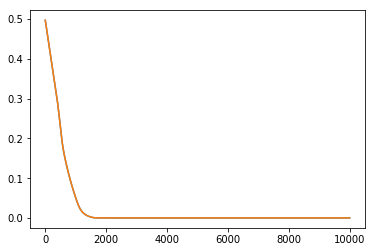

In [22]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [23]:
#list(enumerate(range(10)))

In [24]:
#print (rmse_a)

In [25]:
print (rmse_a[-1])

5.5534503e-05


In [26]:
print (pred_list[-1])

IndexError: list index out of range